# GTZAN Dataset - Music Genre Classification

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import seaborn as sn

# Gráficos
import matplotlib.pyplot as plt

# Preprocesado y modelado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Usando PCA/SVD 

El problema es de clasificación múltiple, el cual requiere de un modelo para diferenciar un género musical de otro.

Leemos nuestro conjunto de datos.

In [2]:
df = pd.read_csv('dataset/features_30_sec.csv')

Visualizamos nuestro conjunto de datos.

In [3]:
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [4]:
df.shape

(1000, 60)

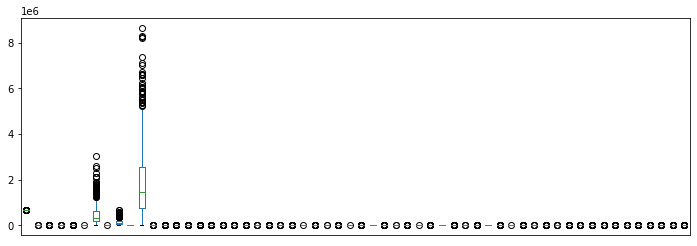

In [5]:
df.plot.box(figsize=(12,4), xticks=[])
plt.show()

### Preprocesamiento de datos

In [6]:
X = df.drop(['filename', 'label'], axis=1) # Seleccionamos las primeras 59 columnas.
y = df['label'] # Seleccionamos la columna 60.

In [7]:
X

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


In [8]:
y

0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
995     rock
996     rock
997     rock
998     rock
999     rock
Name: label, Length: 1000, dtype: object

Ahora bien, la gráfica de cajas nos sugiere que debemos estandarizar los datos de entrada.

La clase StandardScaler estándariza los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1.

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
df_new = pd.DataFrame(X_scaled, columns=X.columns)

In [11]:
df_new.head(5)

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,-0.132822,-0.350137,0.312587,-0.010690,-0.061856,-0.583585,-0.848311,-0.456402,-0.531042,-0.486473,...,-0.086396,-0.246114,0.500462,-0.780265,-0.237040,-0.643177,0.006723,-0.300597,0.604064,-0.512988
1,-0.132822,-0.462482,1.117572,-0.532852,-0.186821,-0.938516,-0.234194,-0.386852,0.796252,-0.648681,...,-0.048102,-0.159175,0.711371,-0.069304,-0.054982,-0.453456,0.544806,-0.407087,0.424127,-0.538421
2,-0.132822,-0.184225,-0.137701,0.679978,-0.084093,-0.906885,-0.781694,-0.940663,-0.630916,-0.971592,...,0.284825,-0.596243,-0.827516,-0.448091,-0.600983,-0.329519,-0.295934,-0.527297,-0.296189,-0.874954
3,-0.132822,0.319639,0.990659,0.154810,0.907029,-1.581429,-0.712095,-1.228256,0.304565,-1.516390,...,-0.080249,-0.482843,0.142153,-0.371370,0.033427,-0.767591,0.455409,-0.779744,-0.602881,-0.844508
4,-0.132822,-0.859077,0.194163,-0.600165,-0.205909,-0.512542,-0.315178,-0.939770,-0.504463,-0.630107,...,-1.238616,0.751318,-0.327220,0.377620,-0.368375,-0.293696,-0.553016,-0.089383,-2.766009,-0.330287


La variable de salida (la columna 60) es un valor de string (correspondiente al género musical). Debemos convertirlos en valores enteros entre 0 y 9. Esto lo podemos lograr usando la clase LabelEncoder, pues ésta modelará la codificación requerida usando todo el conjunto de datos a través de la función fit(), luego aplicará la codificación para crear una nueva variable de salida usando la función transform().

In [12]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

donde obtenemos que 

* 0 $\rightarrow$ blues
* 1 $\rightarrow$ classical
* 2 $\rightarrow$ country
* 3 $\rightarrow$ disco
* 4 $\rightarrow$ hiphop
* 5 $\rightarrow$ jazz
* 6 $\rightarrow$ metal
* 7 $\rightarrow$ pop
* 8 $\rightarrow$ reggae
* 9 $\rightarrow$ rock

In [13]:
df_new2 = pd.DataFrame(encoded_Y)

In [14]:
df_new2

,0
0,0
1,0
2,0
3,0
4,0
...,...
995,9
996,9
997,9
998,9


### PCA

Calculamos la matriz de covarianza.

In [15]:
print('NumPy covariance matrix: \n%s' %np.cov(X_scaled.T))

NumPy covariance matrix: 
[[ 1.001001    0.01744305  0.07405325 ...  0.04593031  0.01481742
   0.05038835]
 [ 0.01744305  1.001001   -0.46219077 ... -0.50226978  0.28224724
  -0.5491257 ]
 [ 0.07405325 -0.46219077  1.001001   ...  0.36565715 -0.23194733
   0.33391461]
 ...
 [ 0.04593031 -0.50226978  0.36565715 ...  1.001001    0.0879116
   0.86958768]
 [ 0.01481742  0.28224724 -0.23194733 ...  0.0879116   1.001001
   0.07218679]
 [ 0.05038835 -0.5491257   0.33391461 ...  0.86958768  0.07218679
   1.001001  ]]


Calculamos los valores y vectores propios.

In [16]:
cov_mat = np.cov(X_scaled.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.03810735 -0.03374727  0.00965878 ... -0.00260618  0.01018434
   0.01393097]
 [ 0.09647633 -0.24483253 -0.07801571 ... -0.13747781  0.03079531
  -0.0347773 ]
 [-0.17830912  0.04846998 -0.01824115 ... -0.08364826  0.01788018
  -0.09759409]
 ...
 [-0.14041943  0.12011549 -0.119591   ... -0.08788806 -0.00371533
   0.0199371 ]
 [ 0.05076002 -0.06872631 -0.0974876  ...  0.03956641  0.0236576
   0.00761984]
 [-0.13874018  0.13719594 -0.09958599 ... -0.10033789 -0.10199705
  -0.1367409 ]]

Eigenvalues 
[1.36833227e+01 9.66927357e+00 6.13413260e+00 4.33745625e+00
 2.61343262e+00 1.96103305e+00 1.70917276e+00 1.48722757e+00
 1.37782972e+00 1.13989851e+00 1.02929919e+00 9.30075637e-01
 9.16263531e-01 7.49639638e-01 7.22387904e-01 6.43822556e-01
 5.53728136e-01 4.95847025e-01 4.60931872e-01 4.22228972e-01
 4.06824915e-01 3.85230743e-01 3.75983262e-01 3.57834942e-01
 2.18565096e-03 5.44089286e-03 7.99853174e-03 2.30503312e-02
 3.34779068e-01 3.51918920e-02 3.12386149e-01 5.274408

Visualizamos la lista de valores propios.

In [17]:
# Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# En orden descendiente.
print('Valores propios en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Valores propios en orden descendiente:
13.683322653128602
9.669273572480826
6.134132596266479
4.337456251448071
2.613432623834737
1.9610330450780389
1.7091727557377288
1.4872275740955163
1.3778297245827762
1.1398985069566023
1.0292991878582956
0.9300756368488631
0.9162635313514255
0.7496396383485631
0.7223879044874213
0.6438225563671005
0.5537281363185511
0.49584702464403785
0.4609318719421676
0.42222897169103635
0.406824915222512
0.3852307433381549
0.37598326211167565
0.35783494159555734
0.3347790680416338
0.3123861493299347
0.2988238447265923
0.2937959177067394
0.285645296093815
0.27497831941868434
0.26240219810096904
0.2470310238033558
0.23632963529794518
0.22434583103328903
0.21623331613368527
0.20902720073503409
0.1983036691512753
0.19534530364760355
0.18024751029577252
0.17437625200090634
0.16796699607910995
0.15745804258351356
0.1468793067478896
0.13393608770201101
0.12526774664297335
0.11993434221434537
0.11638569662750424
0.10740250789480338
0.09975597468776609
0.0887343267375

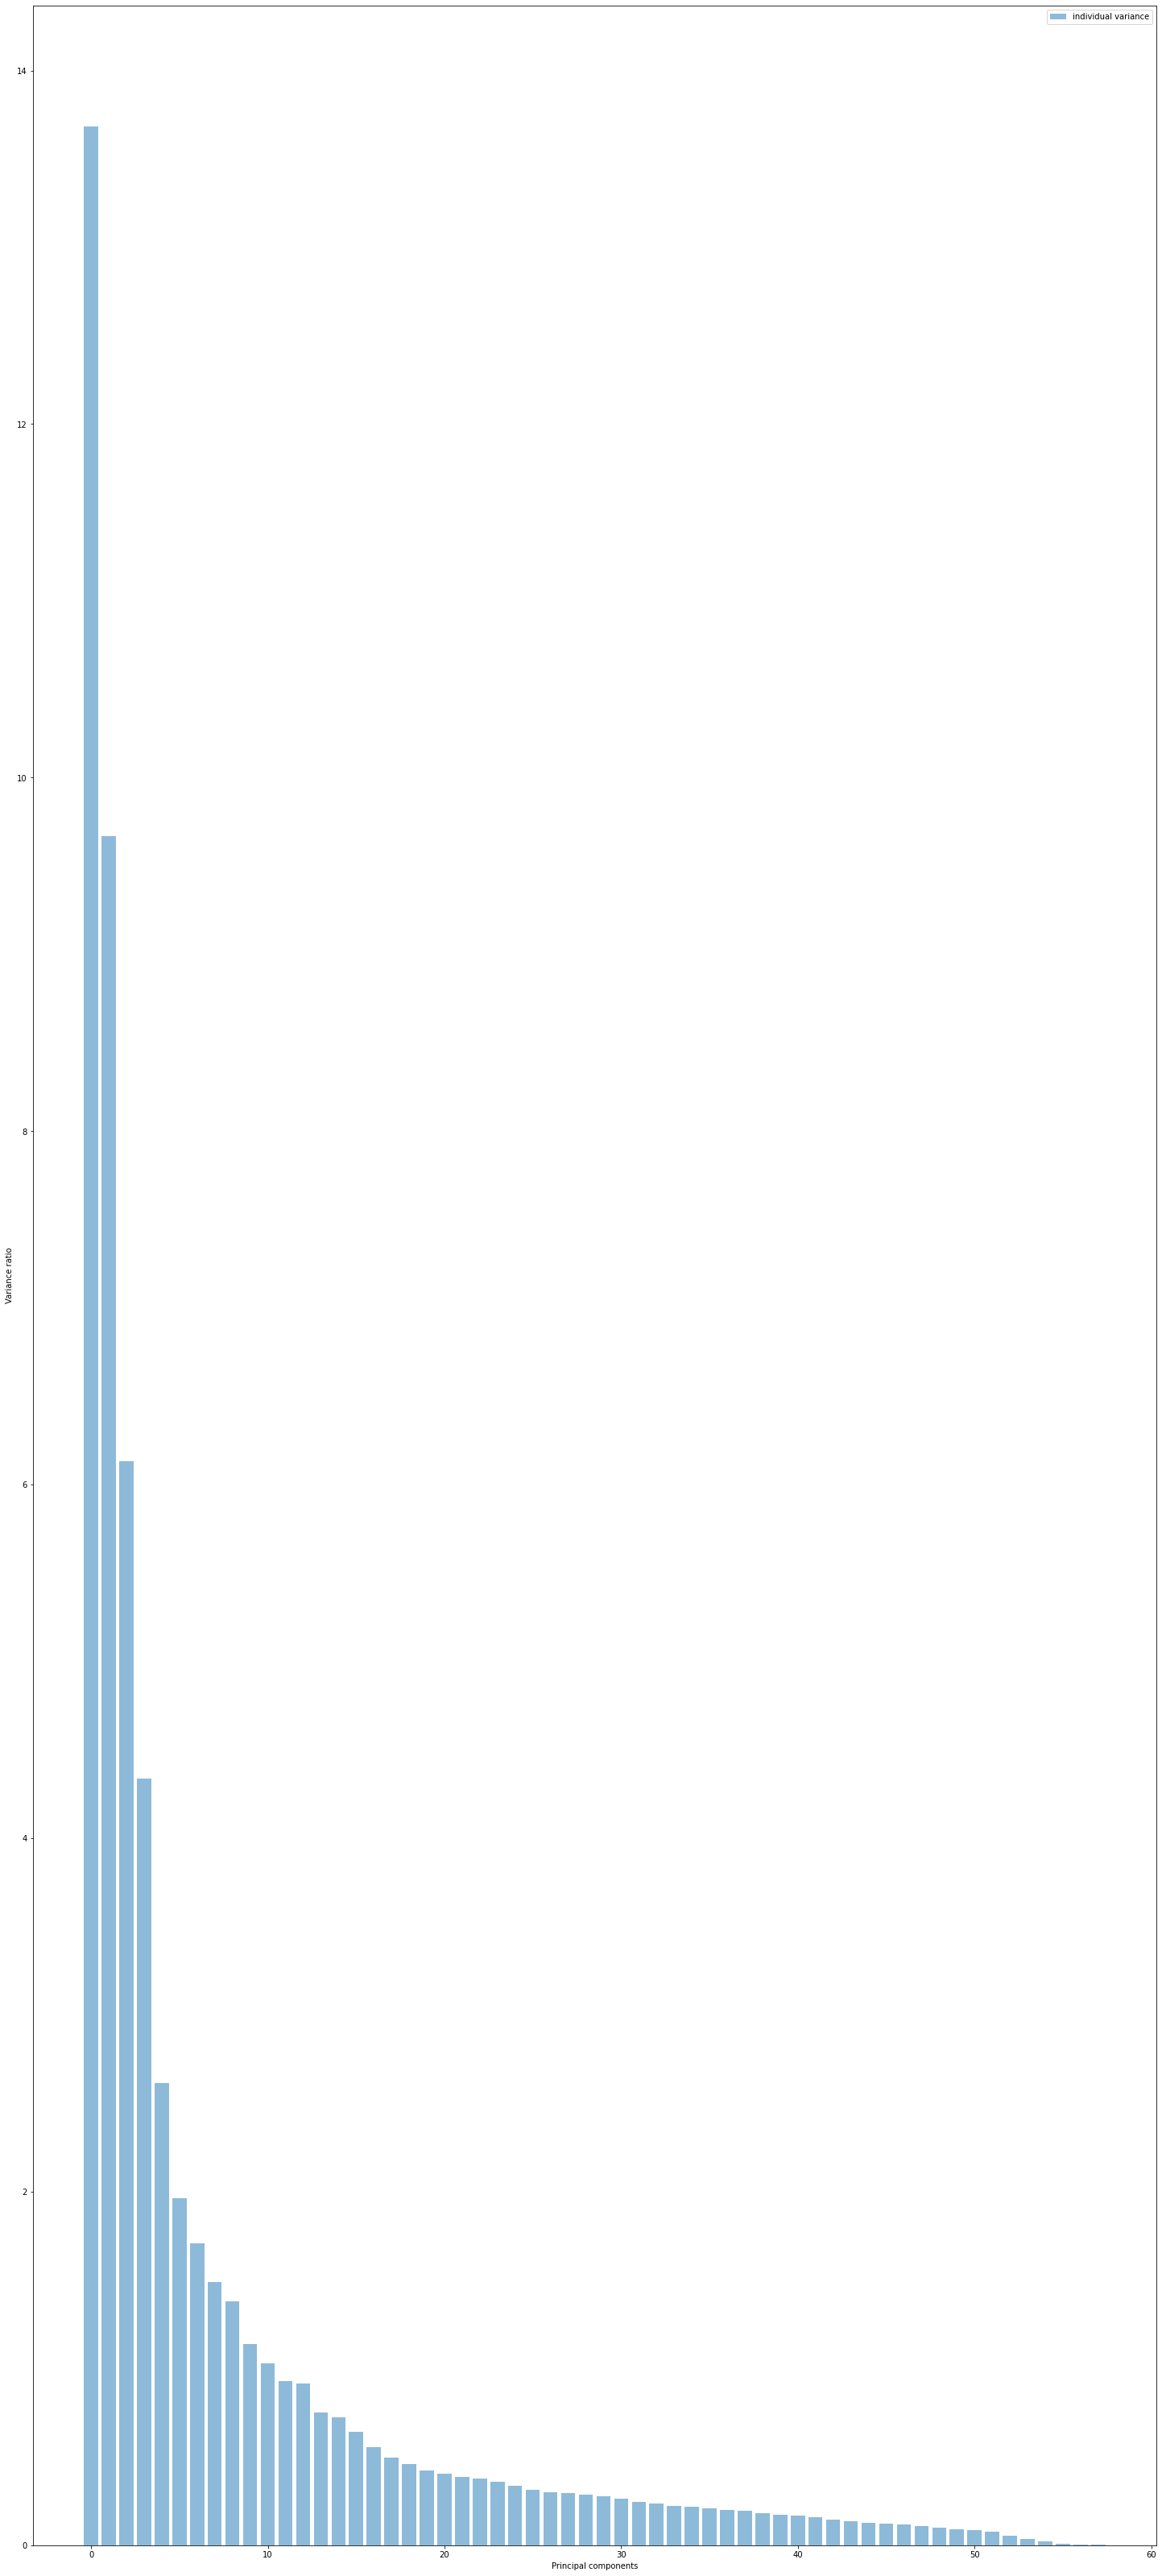

In [18]:
pca = PCA()
pca.fit_transform(X_scaled)
pca_variance = pca.explained_variance_

plt.figure(figsize=(25, 58))
plt.bar(range(58), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

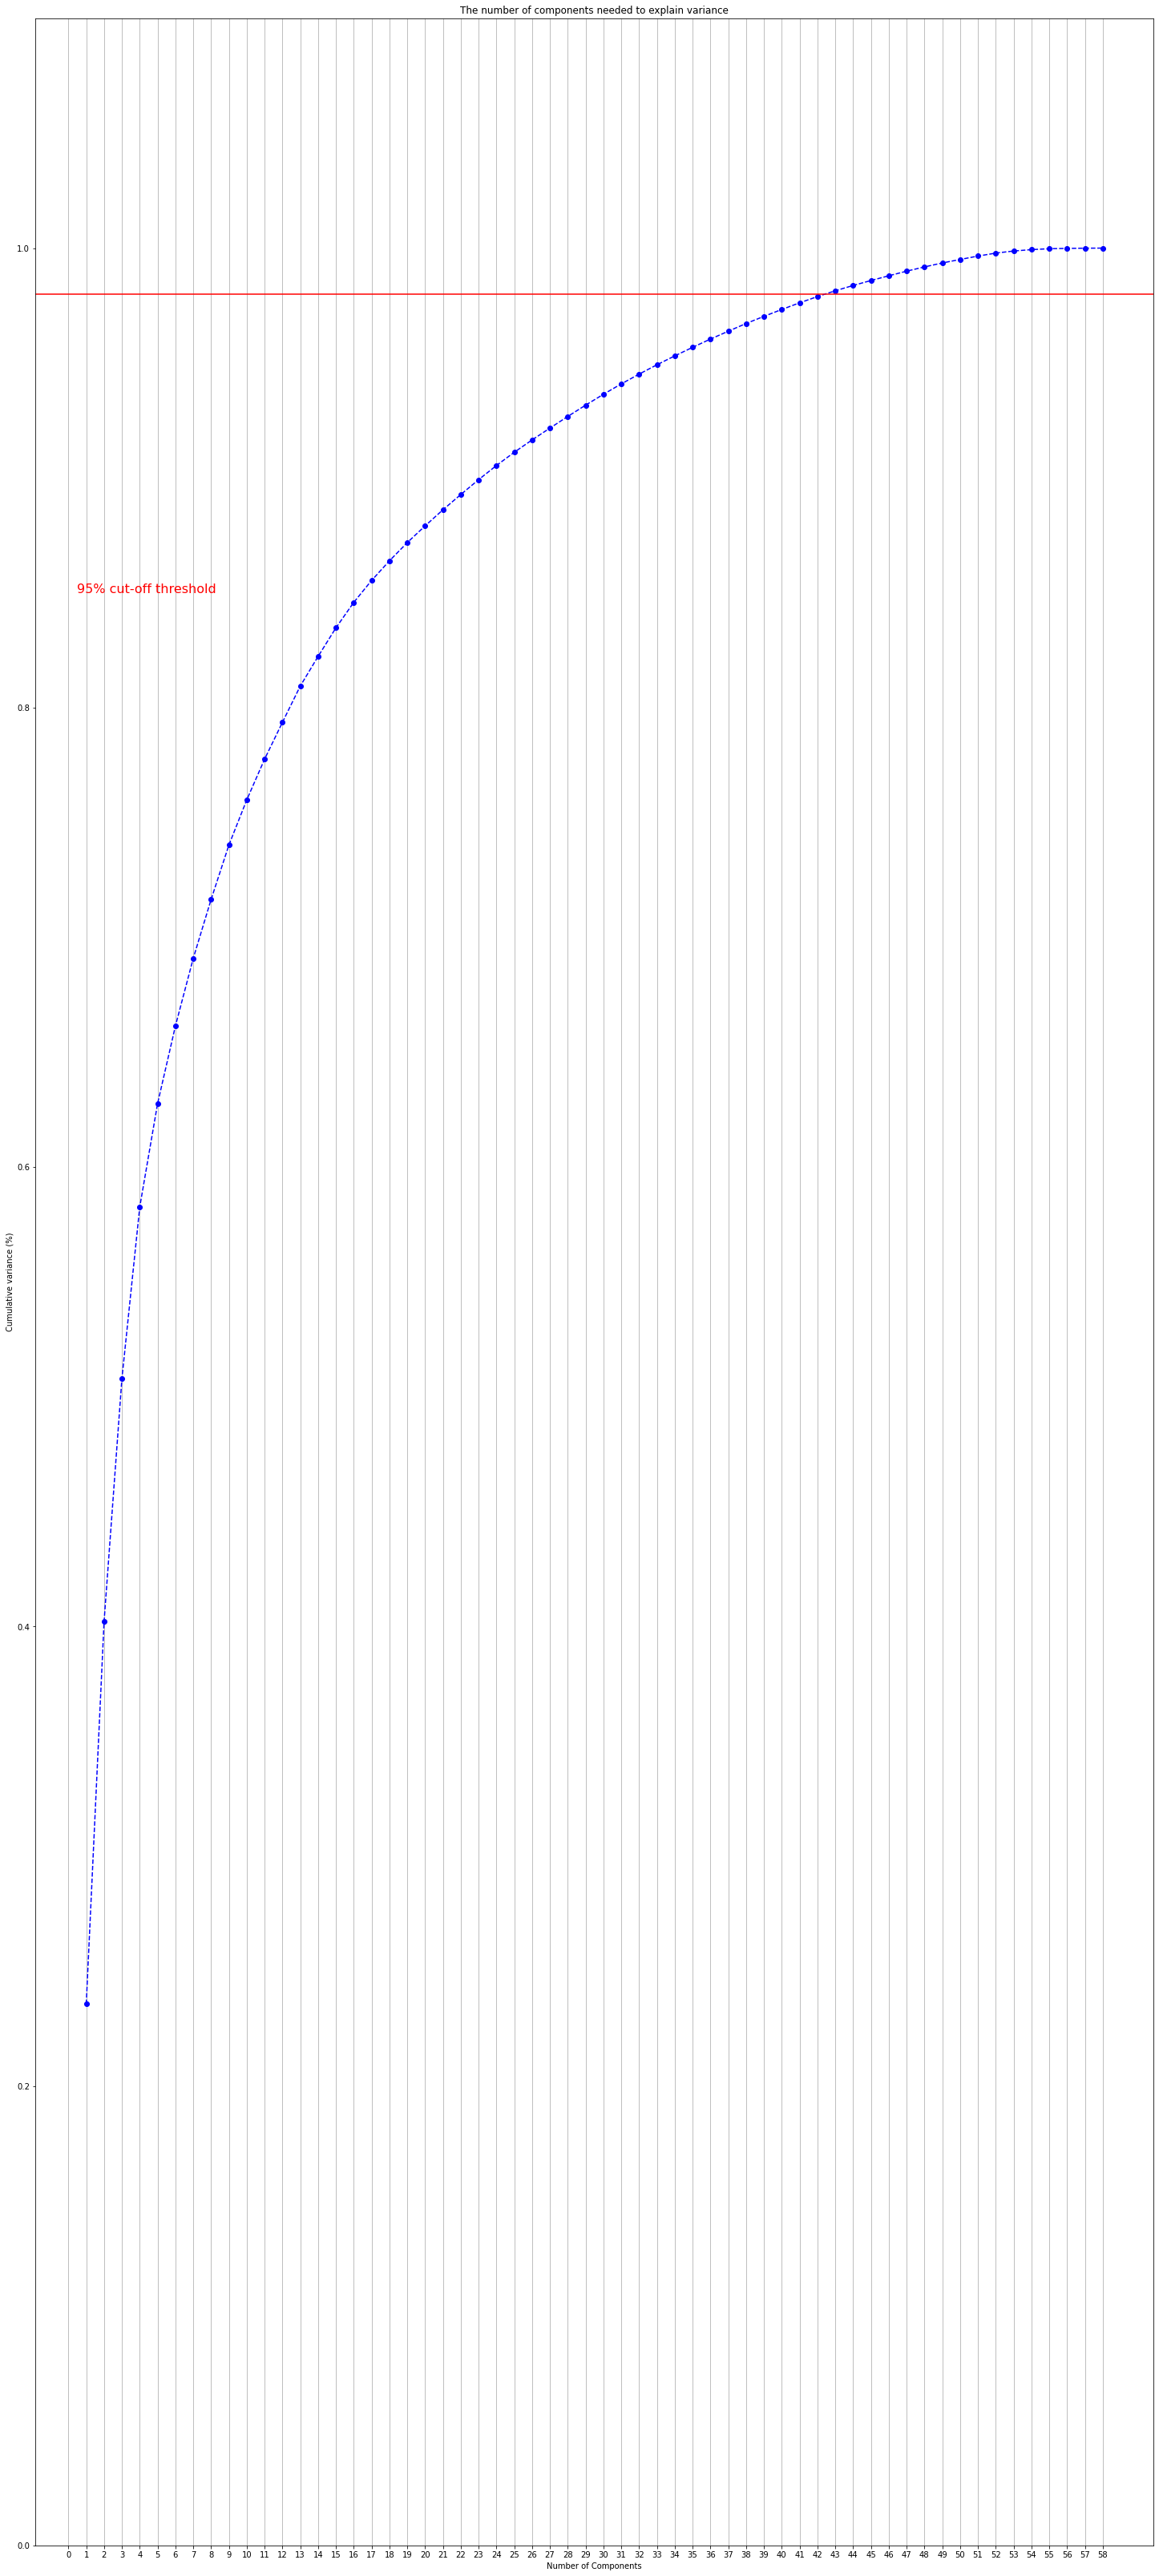

In [19]:
pca = PCA().fit(X_scaled)

plt.rcParams["figure.figsize"] = (25,58)

fig, ax = plt.subplots()
xi = np.arange(1, 59, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 59, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.98, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Instanciamos un objeto de PCA y lo aplicamos.

In [20]:
pca = PCA(n_components=43)
pca.fit(X_scaled) # obtener los componentes principales
X_pca = pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [21]:
print("shape of X_pca", X_pca.shape)
print(pca.explained_variance_ratio_)

shape of X_pca (1000, 43)
[0.23568344 0.1665449  0.10565515 0.07470894 0.04501412 0.0337771
 0.02943903 0.02561621 0.02373193 0.01963377 0.01772879 0.01601975
 0.01578185 0.0129119  0.01244251 0.01108929 0.00953749 0.00854054
 0.00793915 0.00727253 0.00700721 0.00663527 0.00647599 0.0061634
 0.00576628 0.00538058 0.00514698 0.00506038 0.00491999 0.00473626
 0.00451965 0.0042549  0.00407057 0.00386416 0.00372443 0.00360031
 0.00341561 0.00336465 0.00310461 0.00300348 0.00289308 0.00271208
 0.00252987]


### Modelo

In [22]:
# Dividimos nuestro conjunto en entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X_pca, encoded_Y, test_size=0.2)

Creamos el modelo y lo entrenamos.

In [23]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

### Predicciones y resultados

Realizamos predicciones y visualizamos los resultados de éstas.

In [24]:
y_pred = svclassifier.predict(X_test)

In [25]:
print('Accuracy of SVD classifier on training set: {:.2f}'
     .format(svclassifier.score(X_train, y_train)))
print('Accuracy of SVD classifier on test set: {:.2f}'
     .format(svclassifier.score(X_test, y_test)))

Accuracy of SVD classifier on training set: 0.96
Accuracy of SVD classifier on test set: 0.74


In [30]:
dfp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

dfp.head(15)

,Actual,Predicted
0,7,3
1,7,7
2,8,8
3,2,2
4,5,5
5,2,2
6,4,4
7,9,2
8,7,7
9,6,6


In [27]:
print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test, y_pred))
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean Absolute Error: 0.98
Mean squared error: 4.93
Root Mean Squared Error: 2.22
Variance score: 0.42


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.82      0.73        22
           1       1.00      0.93      0.97        15
           2       0.64      0.70      0.67        20
           3       0.56      0.62      0.59        16
           4       0.68      0.59      0.63        22
           5       0.82      0.93      0.87        15
           6       0.82      0.78      0.80        23
           7       0.86      0.75      0.80        24
           8       0.68      0.62      0.65        21
           9       0.81      0.77      0.79        22

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.74      0.75       200



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

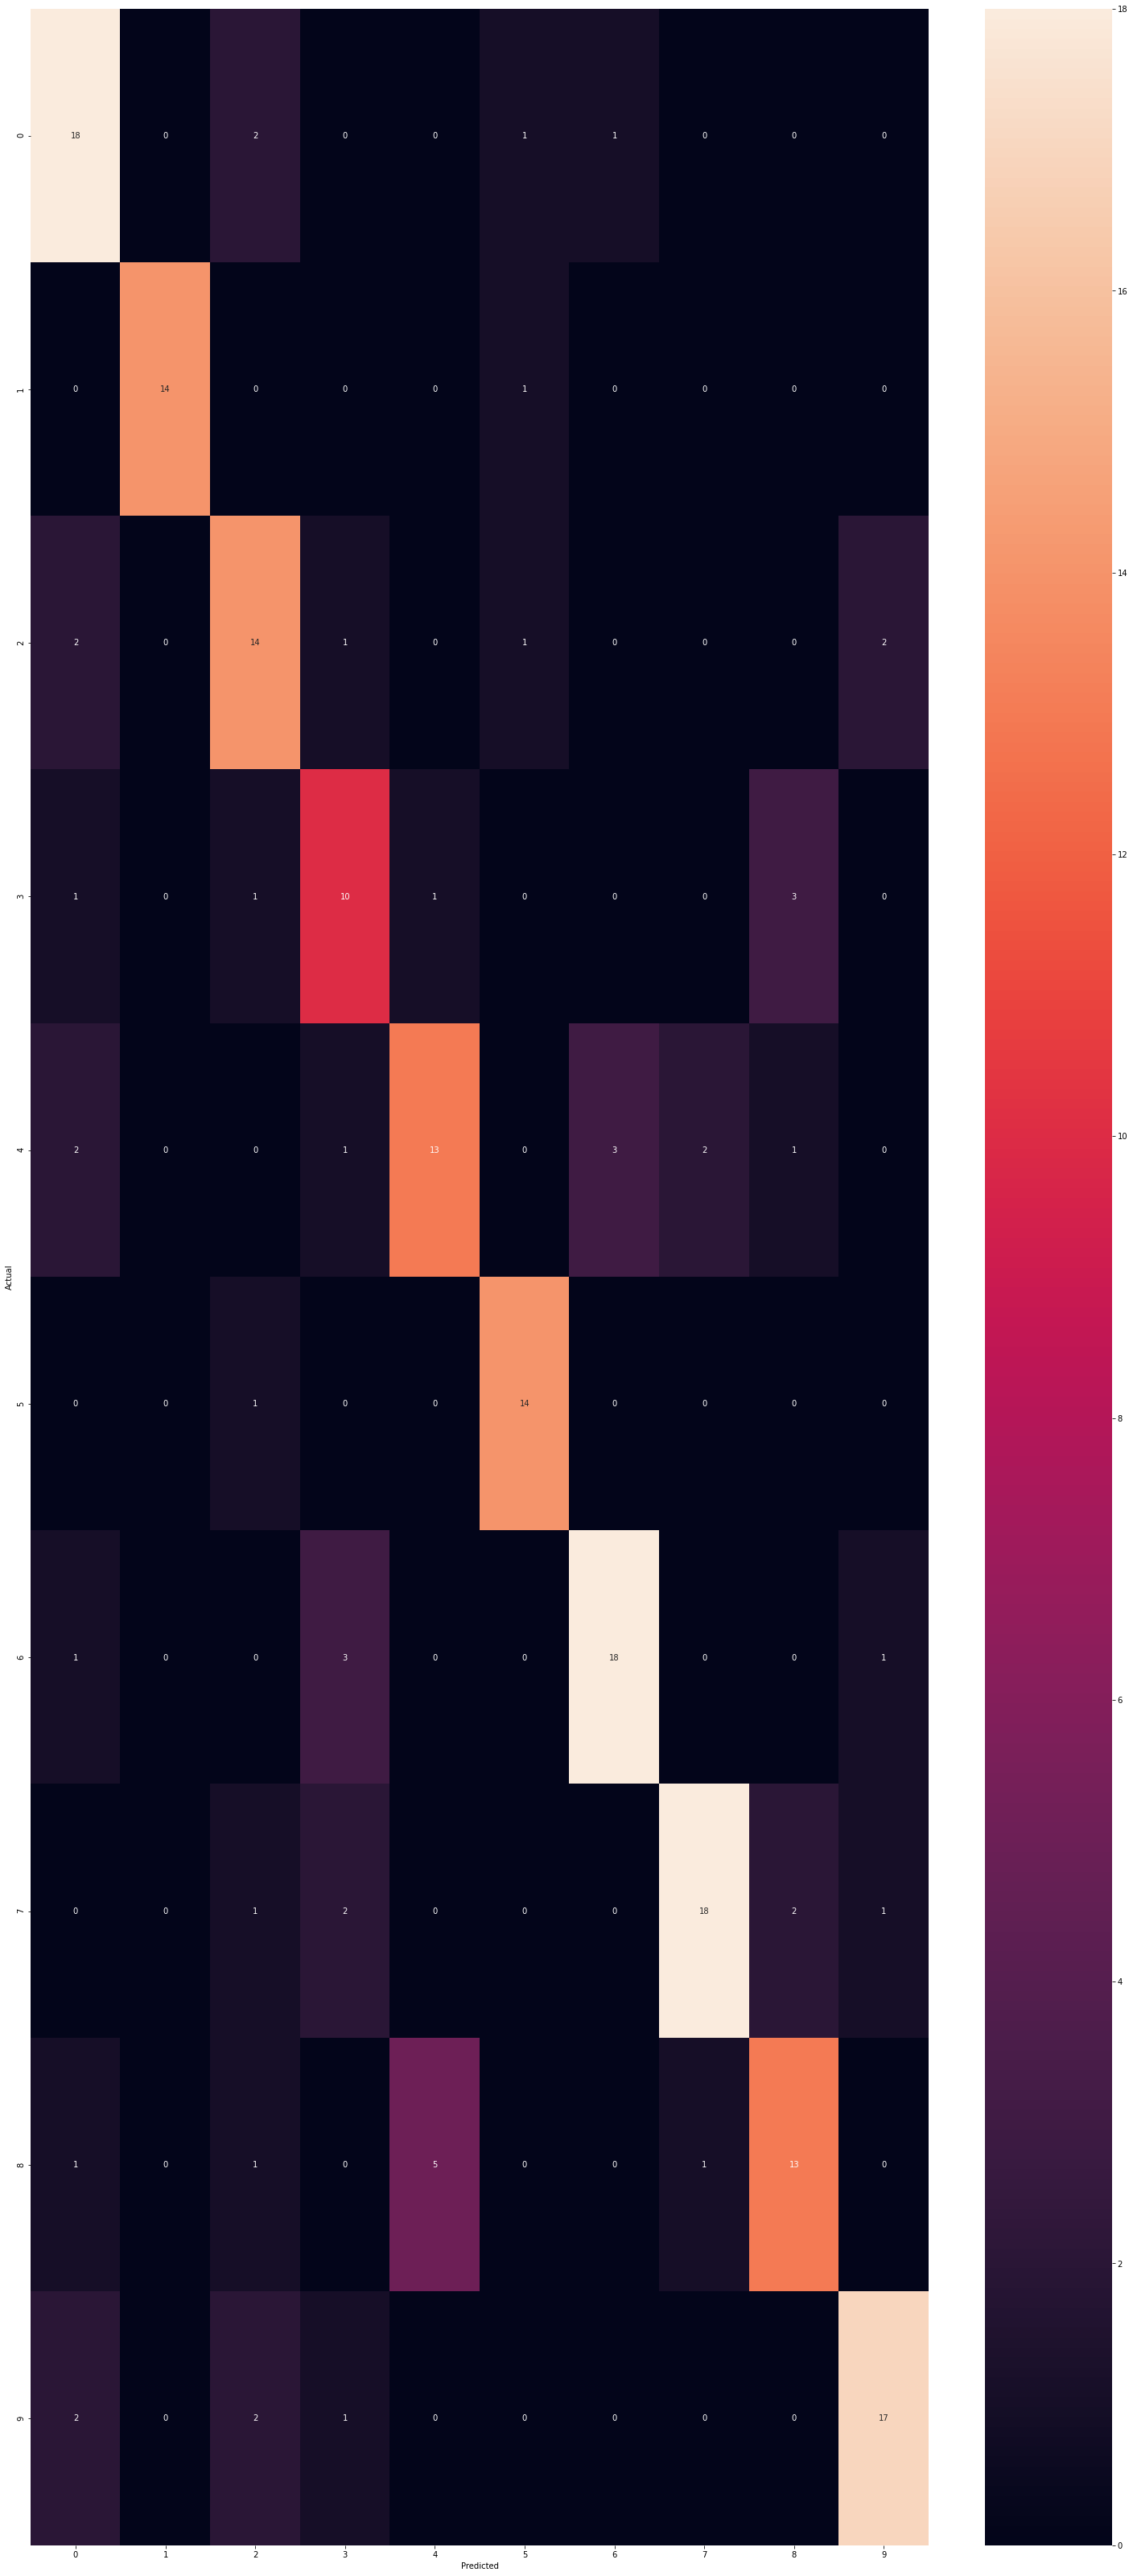

In [29]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)